# Histograms as Objects: Tools for Efficient Analysis and Interactivity

### Aman Goel (speaker), Dr. Hans Peter Dembinski, Henry Fredrick Schreiner, Jay Gohil (speaker)

**12th September, 2022**

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/amangoel185/pyhep-2022-histogramming-talk/HEAD)
[![DOI](https://zenodo.org/badge/534640103.svg)](https://zenodo.org/badge/latestdoi/534640103)

- **Quick Links**
    - Talk - [Indico](https://indico.cern.ch/event/1150631/contributions/5014273/), [Repository](https://github.com/amangoel185/pyhep-2022-histogramming-talk), [Zenodo](https://zenodo.org/badge/latestdoi/534640103), [Binder](https://mybinder.org/v2/gh/amangoel185/pyhep-2022-histogramming-talk/HEAD)
    - boost-histogram - [Documetation](https://boost-histogram.readthedocs.io), [Repository](https://github.com/scikit-hep/boost-histogram)
    - hist - [Documentation](https://hist.readthedocs.io), [Repository](https://github.com/scikit-hep/hist)
    - uproot-browser - [Repository](https://github.com/scikit-hep/uproot-browser)

## What is a Histogram?

According to the standard definition, *histograms are grouped frequency distribution based representation of occurence for numerical data points*.

<center><img src="assets/histogram.png" alt="Histogram Image"></center>

Typically, a histogram consists of axes where:
- Horizontal *x-axis* usually represents classes or columns under which data is grouped, and
- Vertical *y-axis* that represents the frequency of said classes

Let's prepare a default random number generator (NumPy 1.17+)

In [1]:
import hist
from hist import Hist, axis
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rng = np.random.default_rng()

In [3]:
data = np.hstack(
    [
        rng.normal(0, 2, size=40_000),
        rng.normal(3, 0.3, size=5_000),
        rng.normal(-3, 0.3, size=5_000),
    ]
)

In [4]:
h1 = Hist.new.Reg(100, -10, 10).Int64().fill(data)
h1

Hist(Regular(100, -10, 10, label='Axis 0'), storage=Int64()) # Sum: 50000.0

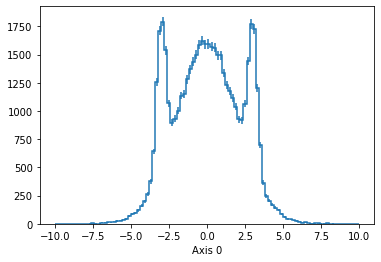

In [5]:
h1.plot();

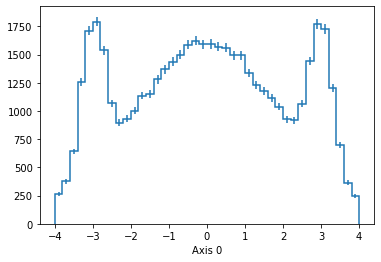

In [6]:
h1[-4j:4j].plot();

In [36]:
# NumPy API
# hist.numpy.histogram(data, bins=100, histogram=Hist)

## Histogramming with Scikit-HEP

<div>
    <span style="font-size:150%"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</b></span>
    <img style="vertical-align:middle" src="assets/bhlogo.webp" alt="2D Histogram" width="270">
    <span style="font-size:150%"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</b></span>
    <img style="vertical-align:middle" src="assets/histlogo.webp" alt="1D Histogram" width="270">
</div>

- **Boost-histogram**
    * The python bindings for Boost::Histogram, a C++14 library, which is one of the fastest libraries for histogramming, while still providing the power of a full histogram object.

- **Hist**
    * The first-party analyst-friendly histogram library that extends boost-histogram with named axes, many new shortcuts including UHI+, plotting shortcuts, and more.

Other histogram members libraries include [UHI](https://github.com/scikit-hep/hist), [mplhep](https://mplhep.readthedocs.io/en/latest/), [histoprint](https://mplhep.readthedocs.io/en/latest/), and [dask-histogram](https://dask-histogram.readthedocs.io/en/stable/).

### A Hist object is made up of:

<div>
    <span style="font-size:150%"><b>2D:&nbsp;&nbsp;</b></span>
    <img style="vertical-align:middle" src="assets/2D_histogram.png" alt="2D Histogram" width="360">
    <span style="font-size:150%"><b>1D:&nbsp;&nbsp;</b></span>
    <img style="vertical-align:middle" src="assets/1D_histogram.png" alt="1D Histogram" width="360">
</div>

- **Axis objects**
    * An axis object defines how storage of data is supposed to look like. Hist has several axes that include:
        *Regular*, *Variable*, *Integer*, *Category*
- **Storage**
    * The storage defines the type of data stored within the histogram, and include:
        * Simple storages: *Double*,*Unlimited*, *Int64*, *AtomicInt64* 
        * Accumulator storages: *Weight*, *Mean*, *WeightedMean*

<center><img src="assets/axes.png" alt="Axes Image" width="720"></center>

### Defining a histogram with Hist

Let's use Hist to define a histogram as an object!

#### Classic definition

In [8]:
h = Hist(
    hist.axis.Regular(50, -5, 5, name="S", label="s [units]", flow=False),
    hist.axis.Regular(50, -5, 5, name="W", label="w [units]", flow=False),
    storage=hist.storage.Weight(),
)
print(h)

Hist(
  Regular(50, -5, 5, underflow=False, overflow=False, name='S', label='s [units]'),
  Regular(50, -5, 5, underflow=False, overflow=False, name='W', label='w [units]'),
  storage=Weight()) # Sum: WeightedSum(value=0, variance=0)


#### QuickConstruct

In [9]:
h = (
    Hist.new.Reg(50, -5, 5, name="s", label="s [units]", flow=False)
    .Reg(50, -5, 5, name="w", label="w [units]", flow=False)
    .Weight()
)
print(h)

Hist(
  Regular(50, -5, 5, underflow=False, overflow=False, name='s', label='s [units]'),
  Regular(50, -5, 5, underflow=False, overflow=False, name='w', label='w [units]'),
  storage=Weight()) # Sum: WeightedSum(value=0, variance=0)


#### QuickContruct with boost_histogram

In [10]:
import boost_histogram as bh

b_hist = bh.Histogram(
    bh.axis.Regular(10, 0, 100, circular=True),
    bh.axis.Regular(10, 0.0, 10.0),
    bh.axis.Variable([1, 2, 3, 4, 5, 5.5, 6]),
)

print(b_hist)

Histogram(
  Regular(10, 0, 100, circular=True),
  Regular(10, 0, 10),
  Variable([1, 2, 3, 4, 5, 5.5, 6]),
  storage=Double())


Hist's Uniform Histogram Indexing+ (UHI+) extends boost-histogram's UHI and provides HEP users with handy accessing shortcuts. For example, to access the centroid element of a 2D-histogram, we can:

### Filling

In [11]:
s_data = rng.standard_normal(50_000)
w_data = rng.standard_normal(50_000)

h.fill(s=s_data, w=w_data, threads=4);

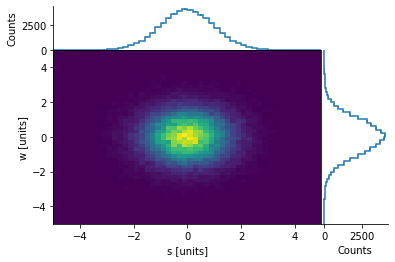

In [12]:
h.plot2d_full();

### Hist Repr

Hist has customized reprs when displaying in a Jupyter and supports dark mode.

In [13]:
h.project("s")

Hist(Regular(50, -5, 5, underflow=False, overflow=False, name='s', label='s [units]'), storage=Weight()) # Sum: WeightedSum(value=50000, variance=50000)

In [14]:
h

Hist(
  Regular(50, -5, 5, underflow=False, overflow=False, name='s', label='s [units]'),
  Regular(50, -5, 5, underflow=False, overflow=False, name='w', label='w [units]'),
  storage=Weight()) # Sum: WeightedSum(value=50000, variance=50000)

Besides the fancy repr, the users can explictly see the data by `.plot()` (using mplhep in the backend) and `.show()` (using histoprint).

### Manipulating the PyHEP logo as an Hist object

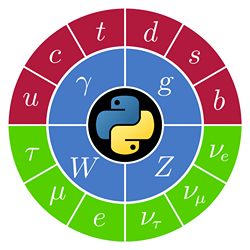

In [15]:
pyhep = Image.open("assets/PyHEP.png")
pyhep

In [16]:
arr = np.asarray(pyhep)[:, :, 2]

In [17]:
rng = np.random.default_rng()
x, y, p = rng.random((3, 200_000))

In [18]:
bx = (x * 200).astype(np.int32)
by = (y * 200).astype(np.int32)

In [19]:
prob = arr[by, bx] / 255

In [20]:
hits = prob > p

In [21]:
X = x[hits]
Y = 1 - (y[hits] / 200 * 200 + (1 / 200))

In [22]:
pyhist = hist.Hist(hist.axis.Regular(400, 0, 1, metadata="x"), hist.axis.Regular(400, 0, 1, metadata="y"))

pyhist.fill(X, Y)

Hist(
  Regular(400, 0, 1, metadata='x', label='Axis 0'),
  Regular(400, 0, 1, metadata='y', label='Axis 1'),
  storage=Double()) # Sum: 117627.0 (118090.0 with flow)

In [23]:
def plt_pyhist(h):
    x, y = h.axes.edges
    plt.pcolormesh(x.T, y.T, h.view().T)
    plt.gca().set_aspect("equal", "box")
    plt.xlabel(h.axes[0].metadata)
    plt.ylabel(h.axes[1].metadata)

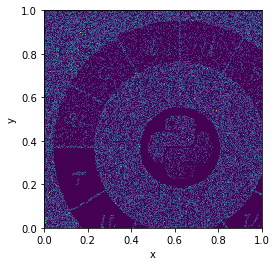

In [24]:
plt_pyhist(pyhist)

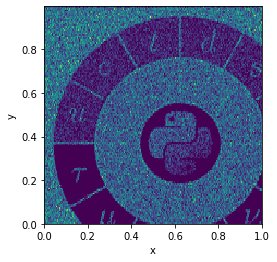

In [25]:
plt_pyhist(pyhist[:: hist.rebin(2), :: hist.rebin(3)])

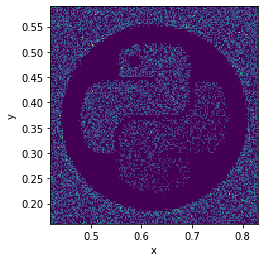

In [26]:
plt_pyhist(pyhist[hist.loc(0.42):hist.loc(0.83), hist.loc(0.16):hist.loc(0.59)])

### Other interesting features

#### Stacks

`hist` supports Stacked Histograms! A histogram stack holds multiple 1-D histograms into a stack, whose axes are required to match.

Manipulation and multiple math operations can also be performed on stacks. You can find more about them in the [Hist - Stack documentation](https://hist.readthedocs.io/en/latest/user-guide/notebooks/Stack.html).

In [27]:
ax = hist.axis.Regular(25, -5, 5, flow=False, name="x")
cax = hist.axis.StrCategory(["signal", "upper", "lower"], name="c")
full_hist = Hist(ax, cax)

full_hist.fill(x=rng.standard_normal(size=600), c="signal")
full_hist.fill(x=2 * rng.standard_normal(size=500) + 2, c="upper")
full_hist.fill(x=2 * rng.standard_normal(size=500) - 2, c="lower")

s = full_hist.stack("c")

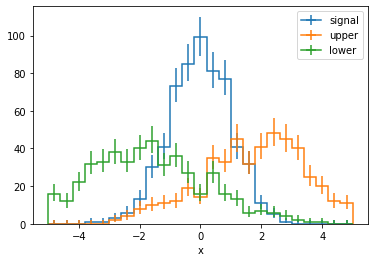

In [28]:
s.plot()
plt.legend();

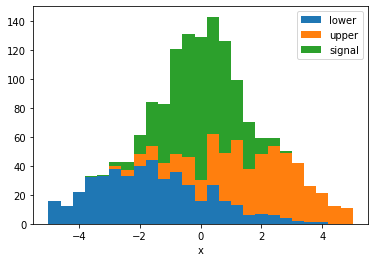

In [29]:
s[::-1].plot(stack=True, histtype="fill")
plt.legend();

#### Interpolation

`hist` supports interpolation in Hist via SciPy. You can find more about them in the [Hist - Interpolation documentation](https://hist.readthedocs.io/en/latest/user-guide/notebooks/Interpolation.html).

In [30]:
from scipy import interpolate

In [31]:
# We obtain evenly spaced numbers over the specified interval.
x = np.linspace(-27, 27, num=250, endpoint=True)

# Define a Hist object and fill it.
interp_h = Hist.new.Reg(10, -30, 30).Double()
centers = interp_h.axes[0].centers
weights = np.cos(-(centers**2) / 9.0) ** 2
interp_h.fill(centers, weight=weights)

Hist(Regular(10, -30, 30, label='Axis 0'), storage=Double()) # Sum: 5.596329884235402

In [32]:
linear_interp = interpolate.interp1d(interp_h.axes[0].centers, interp_h.values(), kind="linear")

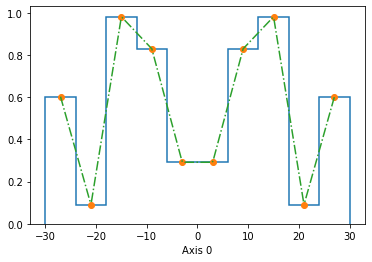

In [33]:
interp_h.plot()  # Plot the histogram
plt.plot(interp_h.axes[0].centers, interp_h.values(), "o")
plt.plot(x, linear_interp(x), "-.");

In [37]:
h1 = h1
%store h1
del h1

Stored 'h1' (Hist)
